# Analysing the Ted talk data

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free.

Since the time we have begun watching TED Talks, they have never ceased to amaze us. We have learned an incredible amount, about fields we were completely alien to, in the form of poignant stories, breathtaking visuals and subtle humor. So in this notebook, we are attempting at finding insights about the world of TED, its speakers and its viewers and try to answer a few questions.

#### Features Available

   * name: The official name of the TED Talk. Includes the title and the speaker.
   * title: The title of the talk
   * description: A blurb of what the talk is about.
   * main_speaker: The first named speaker of the talk.
   * speaker_occupation: The occupation of the main speaker.
   * num_speaker: The number of speakers in the talk.
   * duration: The duration of the talk in seconds.
   * event: The TED/TEDx event where the talk took place.
   * film_date: The Unix timestamp of the filming.
   * published_date: The Unix timestamp for the publication of the talk on TED.com
   * comments: The number of first level comments made on the talk.
   * tags: The themes associated with the talk.
   * languages: The number of languages in which the talk is available.
   * ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
   * related_talks: A list of dictionaries of recommended talks to watch next.
   * url: The URL of the talk.
   * views: The number of views on the talk.
 

## Loading and reading the data

In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime

%matplotlib inline
sns.set_style("whitegrid")

plt.style.use("fivethirtyeight")

In [46]:
ted=pd.read_csv("../data/ted.csv")

In [47]:
ted.isnull().sum()

name                  0
title                 0
description           0
main_speaker          0
speaker_occupation    6
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
comments              0
tags                  0
languages             0
ratings               0
related_talks         0
url                   0
views                 0
dtype: int64

In [48]:
ted.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## Which are the top 15 most viewed talks of all time? 

In [49]:
top_15=ted[['title','views']].sort_values('views',ascending=False).iloc[:15,:]
top_15

,title,views
0,Do schools kill creativity?,47227110
1346,Your body language may shape who you are,43155405
677,How great leaders inspire action,34309432
837,The power of vulnerability,31168150
452,10 things you didn't know about orgasm,22270883
1776,How to speak so that people want to listen,21594632
201,My stroke of insight,21190883
5,Why we do what we do,20685401
2114,This is what happens when you reply to spam email,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",19787465


In [50]:
top_15.set_index("title")

,views
title,
Do schools kill creativity?,47227110
Your body language may shape who you are,43155405
How great leaders inspire action,34309432
The power of vulnerability,31168150
10 things you didn't know about orgasm,22270883
How to speak so that people want to listen,21594632
My stroke of insight,21190883
Why we do what we do,20685401
This is what happens when you reply to spam email,20475972


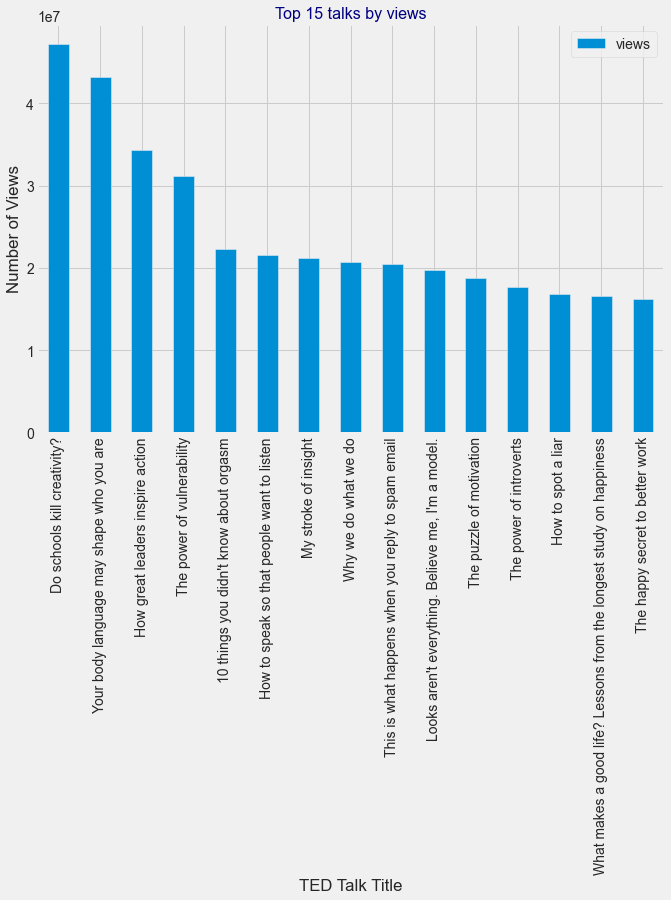

In [51]:
top_15.set_index('title').plot(kind='bar',figsize=(10,7))
plt.title('Top 15 talks by views', fontsize=16, color='navy')
plt.xlabel('TED Talk Title')
plt.ylabel('Number of Views')
plt.show()

## Find out the distribution and summary statistics of views and comments

In [52]:
ted[['views']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   2550 non-null   int64
dtypes: int64(1)
memory usage: 20.0 KB


In [53]:
ted['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [54]:
ted['views_mn']=ted['views'].map(lambda x:x/1000000)

In [55]:
ted["views_mn"].describe()

count    2550.000000
mean        1.698297
std         2.498479
min         0.050443
25%         0.755793
50%         1.124524
75%         1.700759
max        47.227110
Name: views_mn, dtype: float64

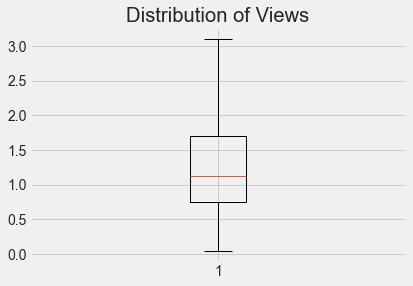

In [56]:
plt.boxplot(ted['views_mn'],showfliers=False)
plt.title('Distribution of Views')
plt.show()

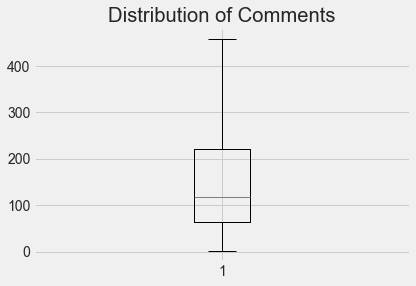

In [57]:
plt.boxplot(ted['comments'],showfliers=False)
plt.title('Distribution of Comments')
plt.show()

In [58]:
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

## Is there any co-relation between views and comments?

In [59]:
ted[['views','comments']].corr().round(4)

,views,comments
views,1.0000,0.5309
comments,0.5309,1.0000


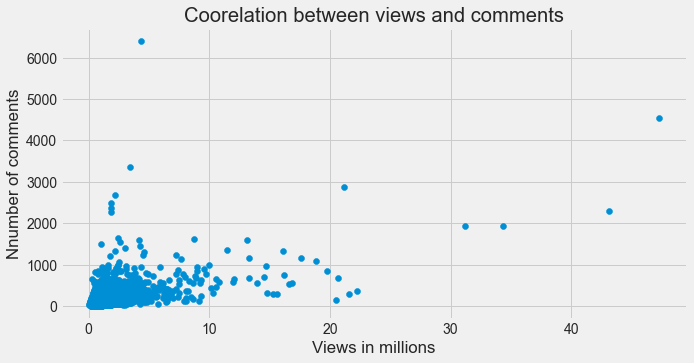

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(x=ted['views_mn'],y=ted['comments'])
plt.title('Coorelation between views and comments')
plt.xlabel('Views in millions')
plt.ylabel('Nnumber of comments')
plt.show()

In [61]:
ted_no_outlier=ted[(ted['views_mn'] <3.3) & (ted['comments']>500)]

In [62]:
ted_no_outlier[['views','comments']].corr().round(4)

,views,comments
views,1.0000,0.1109
comments,0.1109,1.0000


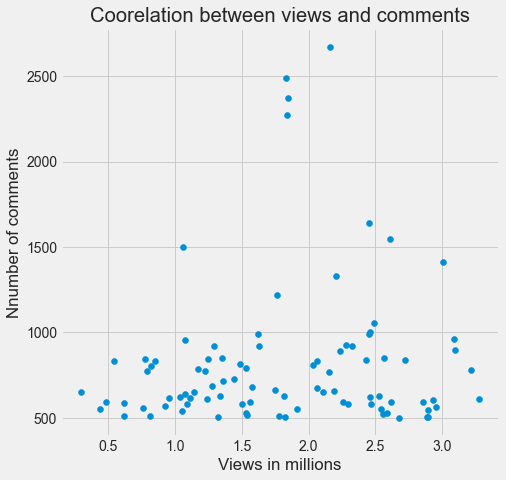

In [63]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(x=ted_no_outlier['views_mn'], y=ted_no_outlier['comments'])
plt.title('Coorelation between views and comments')
plt.xlabel('Views in millions')
plt.ylabel('Nnumber of comments')
plt.show()

## Let us now check the number of views and comments on the 10 most commented TED Talks of all time. What are your observations?

In [64]:
ted[['title','main_speaker','views','comments']].sort_values('comments',ascending=False)[:10]


,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


#### Insight: As can be seen above, Richard Dawkins' talk on Militant Atheism' generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list. This raises some interesting questions which is what we want to explore further.



## Which talks tend to attract the largest amount of discussion?


In [65]:
ted['discussion']=ted['comments']/ted['views']

In [66]:
ted[['title','main_speaker','views','comments','discussion']].sort_values('discussion',ascending=False)[:10]

,title,main_speaker,views,comments,discussion
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220
803,E-voting without fraud,David Bismark,543551,834,0.001534
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236
661,The danger of science denial,Michael Specter,1838628,2272,0.001236
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235


## Who are the top speakers?

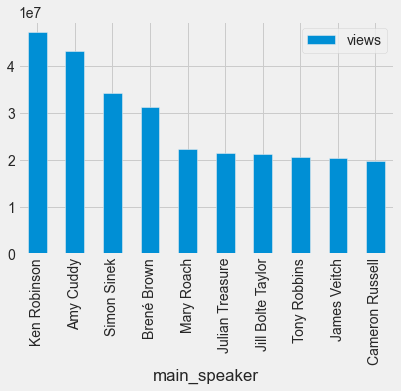

In [67]:
#top speakers w.r.t views
ted[['main_speaker','views']].set_index('main_speaker').sort_values('views',ascending=False)[:10].plot(kind='bar')

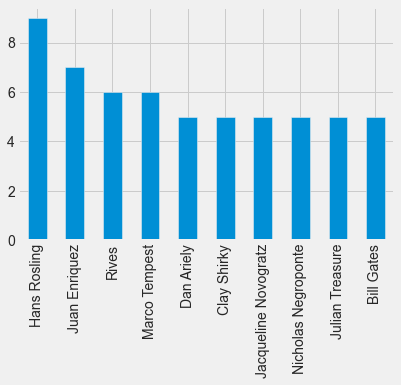

In [68]:
#top speakers w.r.t talks
ted['main_speaker'].value_counts(ascending=False)[:10].plot(kind='bar')

## Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.

In [69]:
ted['speaker_occupation'].value_counts()[:5]

Writer          45
Artist          34
Designer        34
Journalist      33
Entrepreneur    31
Name: speaker_occupation, dtype: int64

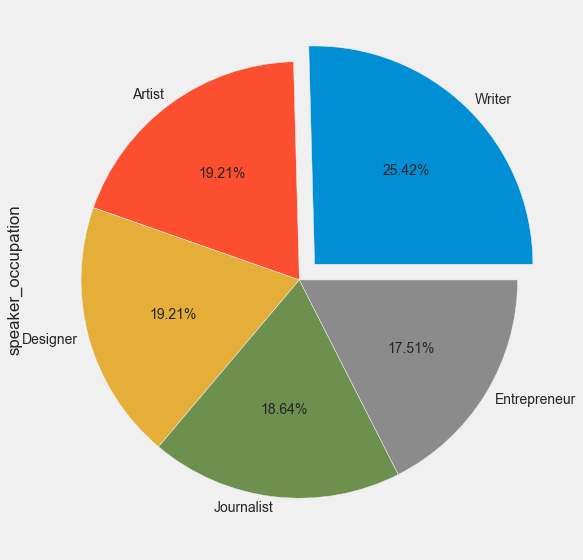

In [70]:
# to show value of %- autopct="%1.2f%%"
plt.figure(figsize=(10,8))
ted['speaker_occupation'].value_counts()[:5].plot(kind='pie',explode=(0.1,0.0,0.0,0.0,0.0),autopct="%1.2f%%",labeldistance=1.05)
plt.tight_layout()

## Do some professions tend to attract a larger number of viewers? 


In [71]:
ted.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views', 'views_mn', 'discussion'],
      dtype='object')

In [72]:
ted_pivot=ted.pivot_table(index='speaker_occupation',values='views_mn',aggfunc=['count','mean','median'])

In [73]:
#this will give in multinidex
ted_pivot

,count,mean,median
,views_mn,views_mn,views_mn
speaker_occupation,,,
Chairman of the Cordoba Initiative,1,0.433202,0.433202
"Child protection leader, activist, author",1,0.656113,0.656113
Robotics engineer,1,0.375647,0.375647
Space physicist,1,1.465749,1.465749
3D printer,1,2.526255,2.526255
...,...,...,...
e-Patient,1,0.534289,0.534289
"inventor, engineer",1,1.415724,1.415724


In [74]:
ted_pivot.columns

MultiIndex([( 'count', 'views_mn'),
            (  'mean', 'views_mn'),
            ('median', 'views_mn')],
           )

In [75]:
# convert multiindex to flat column
ted_pivot.columns = [str(c[0]) + '_' + str(c[1]) for c in ted_pivot.columns]

In [76]:
ted_pivot

,count_views_mn,mean_views_mn,median_views_mn
speaker_occupation,,,
Chairman of the Cordoba Initiative,1,0.433202,0.433202
"Child protection leader, activist, author",1,0.656113,0.656113
Robotics engineer,1,0.375647,0.375647
Space physicist,1,1.465749,1.465749
3D printer,1,2.526255,2.526255
...,...,...,...
e-Patient,1,0.534289,0.534289
"inventor, engineer",1,1.415724,1.415724
medical inventor,1,1.682547,1.682547


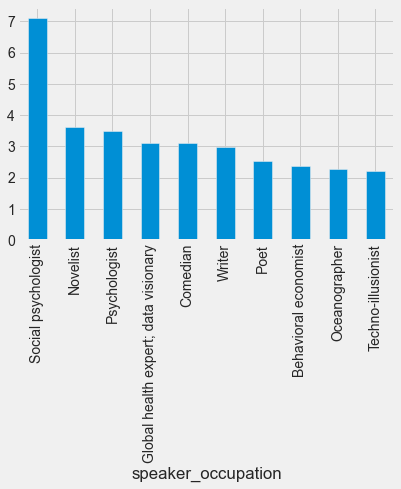

In [77]:
ted_pivot[ted_pivot.count_views_mn >5].sort_values('mean_views_mn',ascending=False)[:10]['mean_views_mn'].plot(kind='bar')

## Convert the duration column in minutes, find the details of the longest and shortest Ted talks in terms of duration.

In [84]:
ted['duration_mins']=ted['duration'].map(lambda x: x/60)

In [79]:
ted[['duration','duration_mins']]

,duration,duration_mins
0,1164,19.400000
1,977,16.283333
2,1286,21.433333
3,1116,18.600000
4,1190,19.833333
...,...,...
2545,476,7.933333
2546,290,4.833333
2547,651,10.850000
2548,1100,18.333333


In [88]:
shortest = np.min(ted['duration_mins'])
longest = np.max(ted['duration_mins'])
average = np.mean(ted['duration_mins'])
median = np.median(ted['duration_mins'])

In [89]:
print(f'Longest talk- {longest} \nShortest talk- {shortest}')

Longest talk- 87.6 
Shortest talk- 2.25


In [90]:
ted['duration_mins'].describe().round(4)

count    2550.0000
mean       13.7752
std         6.2335
min         2.2500
25%         9.6167
50%        14.1333
75%        17.4458
max        87.6000
Name: duration_mins, dtype: float64

In [91]:
ted.pivot_table(index='views_mn',values='duration_mins',aggfunc='mean').reset_index().sort_values('views_mn',ascending=False)[:25]['duration_mins'].mean()

16.101333333333333

## Word cloud for tags

In [105]:

ted['tags'] = ted['tags'].map(lambda x: x.replace('[', '').replace(']', '').split(','))
ted['tags']

0       ['children',  'creativity',  'culture',  'danc...
1       ['alternative energy',  'cars',  'climate chan...
2       ['computers',  'entertainment',  'interface de...
3       ['MacArthur grant',  'activism',  'business', ...
4       ['Africa',  'Asia',  'Google',  'demo',  'econ...
                              ...                        
2545    ['TED Residency',  'United States',  'communit...
2546    ['Mars',  'South America',  'TED Fellows',  'a...
2547    ['AI',  'ants',  'fish',  'future',  'innovati...
2548    ['Internet',  'TEDx',  'United States',  'comm...
2549    ['cities',  'design',  'future',  'infrastruct...
Name: tags, Length: 2550, dtype: object

In [106]:
tags_ls = []

for tag in ted['tags'].values:
    tags_ls.extend(tag)


In [108]:
final_string = ' '.join(list(set(tags_ls))).replace('\'', '').strip()


In [109]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(final_string)

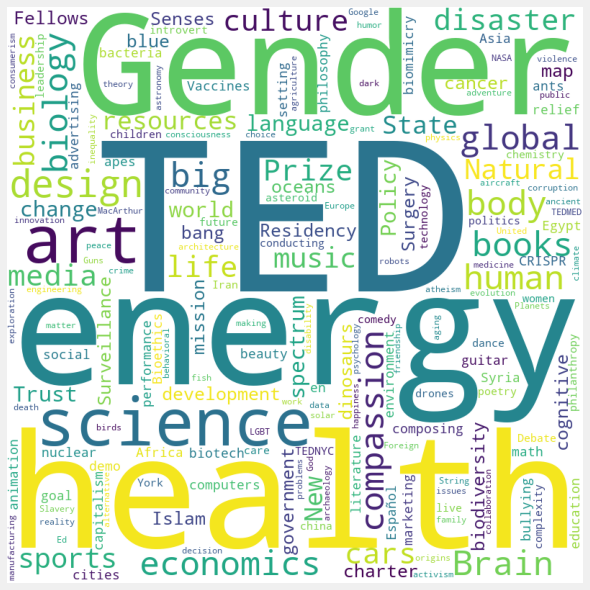

In [110]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()